# Generative Adversarial Networks (GANs)

Kaggle: https://www.kaggle.com/jesucristo/gan-introduction

### Generative Adversarial Networks

São utilizados para gerar imagens. O algorítmo aprende sobre o mundo e cria novas versões das imagens.

* Um **Gerador** é responsável por criar a imagem
* Um **Descriminador** é responsavel por acessar a imagem e trocar informações de similaridade com o gerador.
* Ao realizar o treinamento de uma GAN, ambos aprendem juntos.
- - -

* **Generative**: Significa que o modelo pega um input aleatório e transforma em uma imagem
* **Adversarial**: É capaz de aprender características que discriminam um objeto.
- - -
### Processo GAN
1) Define-se o input como um ruído aleátorio ao gerador. O gerador é responsável por criar algumas imagems que são utilizadas para o treinamento do Descriminador. Ajusta-se algumas característica/imagens ao descriminador para que ele aprenda e gere output de probabilidades. 
    1.1) Após, treina-se o gerador. As imagens criadas são direcionadas ao descriminador novamente, sem incluir as feature images. O gerados aprende a partir de falsos positivos do discriminante.
    1.2) O Discriminante tem output de probabilidades. Os valores são comparados ao que eles deveriam ser. O erro é calculado e regredido para o gerador atualizar os pesos.
    
2) Treinar ambos um pouco mais. Utilizando regressão o gerador entende o erro e começa a refazer mais parecidamente à feature.

### Exemplos
* Gerar Imagens
* Modificar Imagens
* Super Resolução
* Copiar Artistas
* Imagens Foto-realisticas
* Gerar discurso
* Envelhecer



In [6]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm
import os

There are 20579 pictures of dogs.


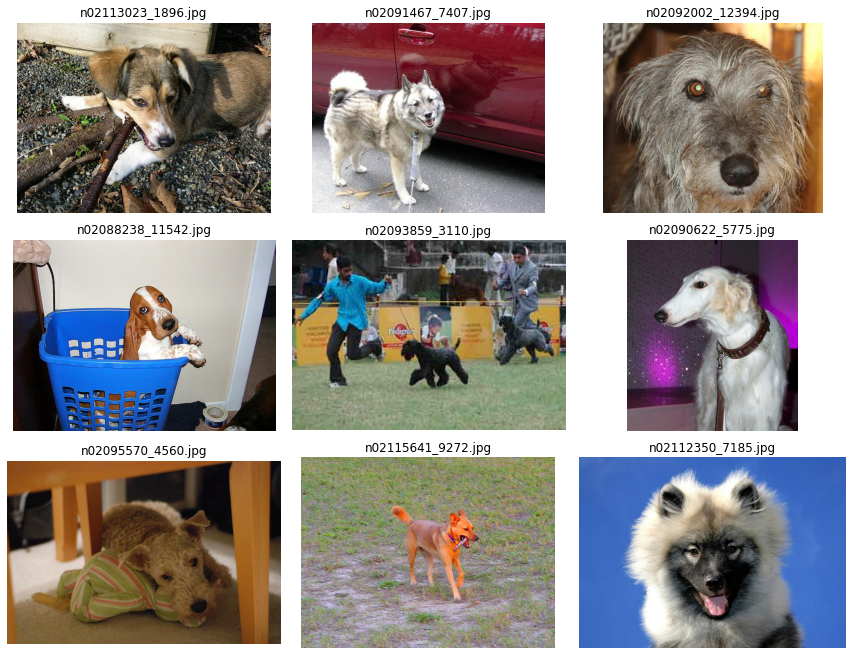

In [9]:
PATH = 'all-dogs/'
images = os.listdir(PATH)
print(f'There are {len(os.listdir(PATH))} pictures of dogs.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH)))
    # https://matplotlib.org/users/image_tutorial.html
    img = plt.imread(PATH + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

